In [68]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import seaborn as sns

In [69]:
df = pd.read_csv('data/Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [71]:
df.isna().sum().sum()

0

In [72]:
df['life_expec'].max()

82.8

In [73]:
scaler = preprocessing.StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df.drop('country', axis=1)), columns=df.drop('country', axis=1).columns)
#df_norm['country'] = df['country'].apply(lambda x: x)

In [74]:
df_norm

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

<AxesSubplot: >

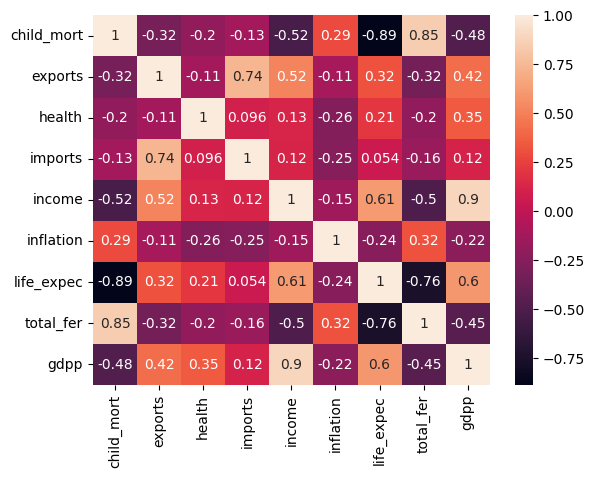

In [75]:
sns.heatmap(df_norm.corr(), annot=True)

In [76]:
pca = PCA(n_components=0.9)
principalComponents = pca.fit_transform(df_norm)
principalComponents.shape

(167, 5)

In [77]:
round(pca.explained_variance_ratio_[0],2)

0.46

In [78]:
pd.DataFrame(principalComponents).corr()

0             1             2             3             4
0  1.000000e+00 -7.360820e-17 -2.961308e-17 -2.490982e-16 -6.395038e-17
1 -7.360820e-17  1.000000e+00  1.126090e-16  3.709215e-16 -1.276047e-16
2 -2.961308e-17  1.126090e-16  1.000000e+00  2.818748e-17  5.850458e-16
3 -2.490982e-16  3.709215e-16  2.818748e-17  1.000000e+00  2.406921e-16
4 -6.395038e-17 -1.276047e-16  5.850458e-16  2.406921e-16  1.000000e+00

In [82]:
sil = list()
for i in range(2,11):
    km = cluster.KMeans(n_clusters=i, random_state=1)
    km.fit(df_norm)
    sil.append(metrics.silhouette_score(df_norm, km.labels_))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

In [83]:
sil

[0.28735668921406704,
 0.28329575683463126,
 0.2959517057752815,
 0.21750750872974378,
 0.22349456512610175,
 0.24838173573976768,
 0.23956710511676946,
 0.25183114111487986,
 0.21093017686782367]

In [89]:
km = cluster.KMeans(n_clusters=4, random_state=1)
km.fit(df_norm)
df['cluster'] = km.labels_
df.sort_values(['child_mort'], ascending=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   
..                        ...         ...      ...     ...      ...     ...   
53                    Finland         3.0     38.7    8.95     37.4   39800   
144                    Sweden         3.0     46.2    9.63     40.7   42900   
133                 Singapore         2.8    200.0    3.96    174.0   72100   
91                 Luxembourg         2.8    175.0    7.77    142.0   91700   
68                    Iceland         2.6     53.4    9.40     43.3   38800   

     inflation  life_expec  total_fer    gdpp  cluster  
66       5.450        32.1       3.33     662        1  
132     17.200        55.0       5.20     399        1  
32       6.390        56.5       6.59     897        1  
31       2.010        47.5       5.21     446        1  
97       4.370        59.5       6.55     708        1  
..         ...         ...        ...     ...      ...  
53       0.351        80.0       1.87   46200        0  
144      0.991        81.5       1.98   52100        0  
133     -0.046        82.7       1.15   46600        2  
91       3.620        81.3       1.63  105000        2  
68       5.470        82.0       2.20   41900        0  

[167 rows x 11 columns]

In [90]:
df[df['cluster'] == 1].sort_values('life_expec', ascending=True)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0    15.30    6.91     64.7    1500   
87                    Lesotho        99.7    39.40   11.10    101.0    2380   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
166                    Zambia        83.1    37.00    5.89     30.9    3280   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
137              South Africa        53.7    28.60    8.94     27.4   12000   
106                Mozambique       101.0    31.50    5.21     46.2     918   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
32                       Chad       150.0    36.80    4.53     43.5    1930   
155                    Uganda        81.0    17.10    9.01     28.6    1540   
21                   Botswana        52.5    43.60    8.30     51.3   13300   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
26                    Burundi        93.6     8.92   11.60     39.2     764   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
108                   Namibia        56.0    47.80    6.78     60.7    8460   
150                      Togo        90.3    40.20    7.65     57.3    1210   
112                     Niger       123.0    22.20    5.16     49.1     814   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
97                       Mali       137.0    22.80    4.98     35.1    1870   
3                      Angola       119.0    62.30    2.85     42.9    5900   
38                Congo, Rep.        63.9    85.10    2.46     54.7    5190   
113                   Nigeria       130.0    25.30    5.07     17.4    5150   
81                   Kiribati        62.7    13.30   11.30     79.9    1730   
88                    Liberia        89.3    19.10   11.80     92.6     700   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
49          Equatorial Guinea       111.0    85.80    4.48     58.9   33700   
50                    Eritrea        55.2     4.79    2.66     23.3    1420   
17                      Benin       111.0    23.80    4.10     37.2    1820   
59                      Ghana        74.7    29.50    5.22     45.9    3060   
80                      Kenya        62.2    20.70    4.75     33.6    2480   
55                      Gabon        63.7    57.70    3.50     18.9   15400   
84                        Lao        78.9    35.40    4.47     49.3    3980   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
116                  Pakistan        92.1    13.50    2.20     19.4    4280   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
142                     Sudan        76.7    19.70    6.32     17.2    3370   
72                       Iraq        36.9    39.40    8.41     34.1   12700   
165                     Yemen        56.3    30.00    5.18     34.4    4480   
99                 Mauritania        97.4    50.70    4.41     61.2    3320   
149               Timor-Leste        62.6     2.20    9.12     27.8    1850   

     inflation  life_expec  total_fer   gdpp  cluster  
66       5.450        32.1       3.33    662        1  
87       4.150        46.5       3.30   1170        1  
31       2.010        47.5       5.21    446        1  
166  